In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_curve,roc_auc_score
#from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('D:\CreditCardFraudDetection\creditcard.csv')
print(f"Number of rows in the dataset is {df.shape[0]}")
print(f"Number of columns in the dataset is {df.shape[1]}")

Number of rows in the dataset is 284807
Number of columns in the dataset is 31


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Column names are as follows \n")
df.columns

Column names are as follows 



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.drop(["Time"],axis=1,inplace=True)

In [6]:
df.isna().sum()   #checking for null values

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df_fraud=df[df.Class==1]   #fraud transactions
df_true=df[df.Class==0]    #true transactions
df_true=df_true.sample(frac=0.5)  #since the number of true transactions were more than the fraud transactions so the data was imbalanced therefore we make new dataset considering only 50% of true transactions and 100% fraud transactions
data=pd.concat([df_true,df_fraud])  #combining true and fraud transactions into a new dataframe
data=data.reset_index(drop=True)  #reseting the index
data.shape

(142650, 30)

In [8]:
data['Amount'].describe()

count    142650.000000
mean         88.032928
std         252.760036
min           0.000000
25%           5.500000
50%          22.000000
75%          77.000000
max       25691.160000
Name: Amount, dtype: float64

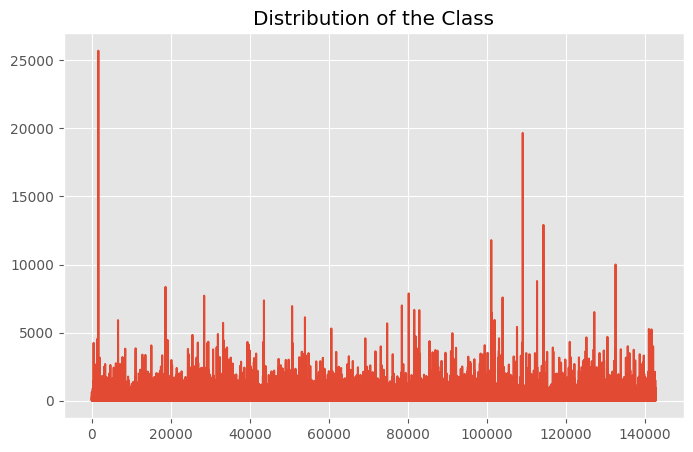

In [9]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distribution of the Class")
    plt.plot(data['Amount'])
    plt.show()

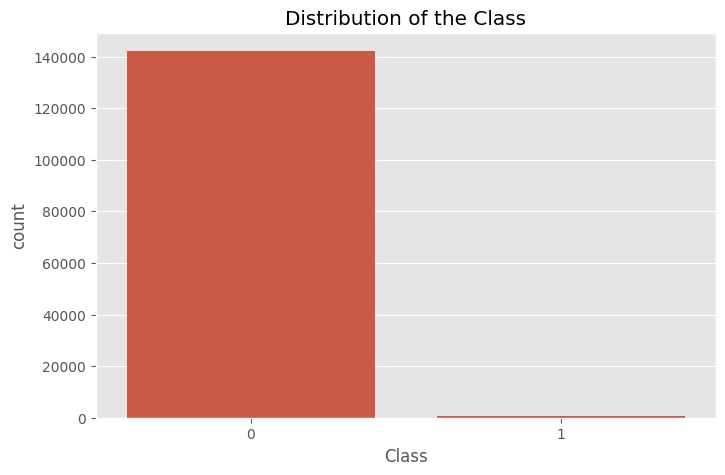

In [10]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distribution of the Class")
    sns.countplot(data=data,x=data['Class'])
    plt.show()

In [11]:
fraud_percent=round(len(df[df.Class==1])/len(df[df.Class==0])*100,2)
print(f"The percentage of fraud transactions is {fraud_percent}%")

The percentage of fraud transactions is 0.17%


In [12]:
#Since the amount column values have lot of variance therefore we need to scale its values
sc=StandardScaler()
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))
data.Amount

0         0.901914
1        -0.170253
2        -0.138167
3        -0.091324
4        -0.273473
            ...   
142645    1.194683
142646   -0.345281
142647   -0.040129
142648    0.621014
142649   -0.180025
Name: Amount, Length: 142650, dtype: float64

In [13]:
data.drop_duplicates(inplace=True)  #drop duplicate columns

In [14]:
data.shape

(139552, 30)

In [15]:
X=data.drop(['Class'],axis=1)
Y=data['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
print(f"Number if fraud transactions in training data is {Y_train[Y_train==1].count()}")
print(f"Number if true transactions in training data is {Y_train[Y_train==0].count()}")

Number if fraud transactions in training data is 385
Number if true transactions in training data is 111256


Using Logistic Regression

In [17]:
model_logistic=LogisticRegression()
model_logistic.fit(X_train,Y_train)
Y_pred_logistic=model_logistic.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_logistic)
print(f"The accuracy of the logistic regression model is {round(accuracy*100,2)}")

The accuracy of the logistic regression model is 99.87


In [18]:
print(f"The f1-score of the model is {round(f1_score(Y_test,Y_pred_logistic),2)}")

The f1-score of the model is 0.77


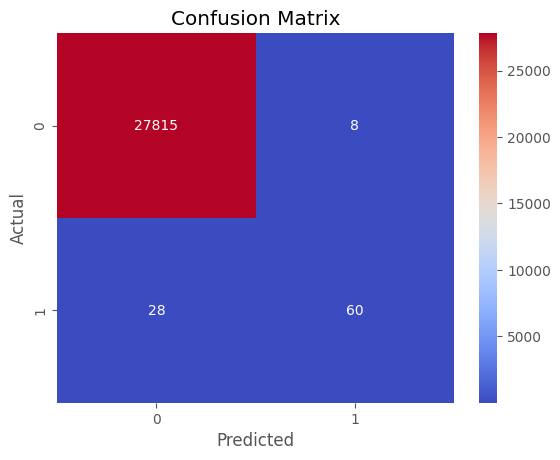

In [19]:
with plt.style.context('ggplot'):
    sns.heatmap(confusion_matrix(Y_test, Y_pred_logistic), annot=True, fmt='d', cmap="coolwarm")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Using Random Forest

In [20]:
model_random=RandomForestClassifier()
model_random.fit(X_train,Y_train)
Y_pred_random=model_random.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_random)
print(f"The accuracy of the random forest model is {round(accuracy*100,2)}")

The accuracy of the random forest model is 99.92


In [21]:
print(f"The f1-score of the model is {round(f1_score(Y_test,Y_pred_random),2)}")

The f1-score of the model is 0.87


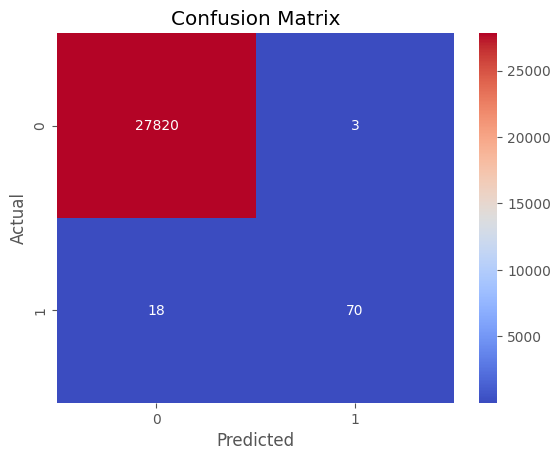

In [22]:
with plt.style.context('ggplot'):
    sns.heatmap(confusion_matrix(Y_test, Y_pred_random), annot=True, fmt='d', cmap="coolwarm")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Using XGBoost Model

In [23]:
model_xgboost=XGBClassifier()
model_xgboost.fit(X_train,Y_train)
Y_pred_xgboost=model_xgboost.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_xgboost)
print(f"The accuracy of the xgboost model is {round(accuracy*100,2)}")

The accuracy of the xgboost model is 99.92


In [24]:
print(f"The f1-score of the model is {round(f1_score(Y_test,Y_pred_xgboost),2)}")

The f1-score of the model is 0.86


Plotting ROC-AUC Curve

The AUC of the logistic regression model is 0.84
The AUC of the random forest model is 0.9
The AUC of the xgboost model is 0.89


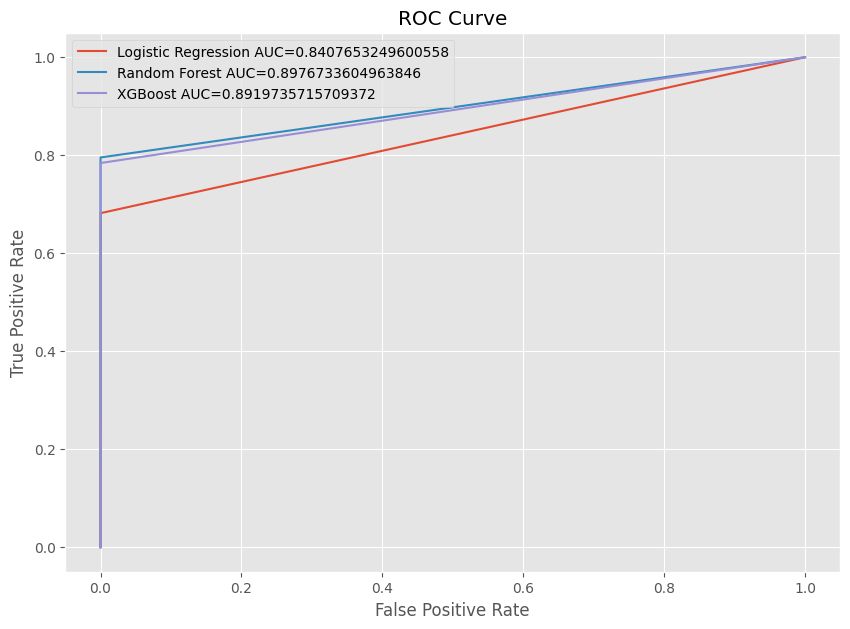

In [ ]:
#logistic regression model
fpr_log,tpr_log,thresholds_log=roc_curve(Y_test,Y_pred_logistic)  #fpr=false positive rate, tpr=true positive rate and thresholds=threshold values
auc_log=roc_auc_score(Y_test,Y_pred_logistic)

#random forest model
fpr_rf,tpr_rf,thresholds_rf=roc_curve(Y_test,Y_pred_random)  #fpr=false positive rate, tpr=true positive rate and thresholds=threshold values
auc_rf=roc_auc_score(Y_test,Y_pred_random)

#xgboost model
fpr_xgboost,tpr_xgboost,thresholds_xgboost=roc_curve(Y_test,Y_pred_xgboost)  #fpr=false positive rate, tpr=true positive rate and thresholds=threshold values
auc_xgboost=roc_auc_score(Y_test,Y_pred_xgboost)

print(f"The AUC of the logistic regression model is {round(auc_log,2)}")
print(f"The AUC of the random forest model is {round(auc_rf,2)}")
print(f"The AUC of the xgboost model is {round(auc_xgboost,2)}")

with plt.style.context('ggplot'):
    plt.figure(figsize=(10,7))
    plt.plot(fpr_log,tpr_log,label="Logistic Regression AUC="+str(auc_log))
    plt.plot(fpr_rf,tpr_rf,label="Random Forest AUC="+str(auc_rf))
    plt.plot(fpr_xgboost,tpr_xgboost,label="XGBoost AUC="+str(auc_xgboost))
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

The PR AUC of the logistic regression model is 0.81
The PR AUC of the random forest model is 0.86
The PR AUC of the xgboost model is 0.85


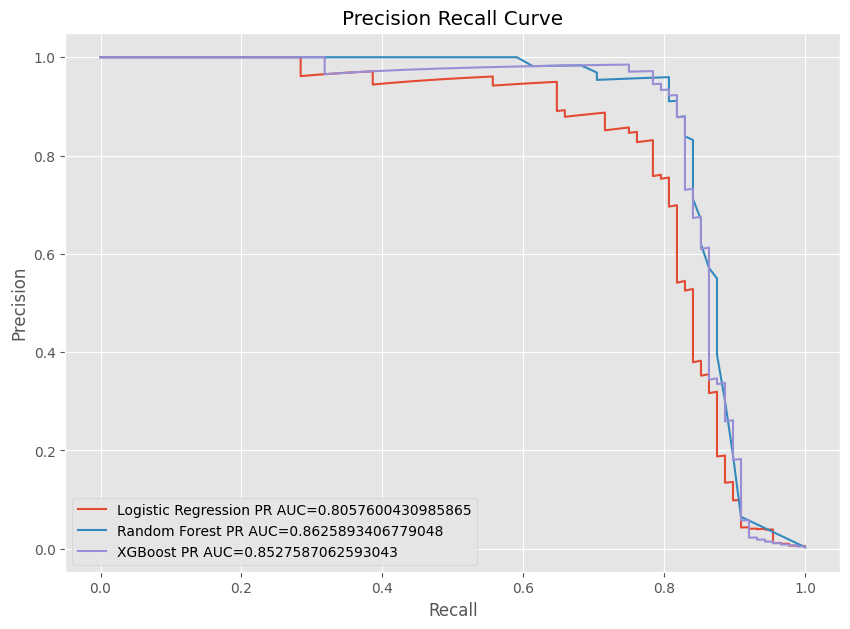

In [26]:
Y_pred_logistic_prob=model_logistic.predict_proba(X_test)[:,1]
Y_pred_random_prob=model_random.predict_proba(X_test)[:,1]
Y_pred_xgboost_prob=model_xgboost.predict_proba(X_test)[:,1]

precision_log,recall_log,thresholds_log=metrics.precision_recall_curve(Y_test,Y_pred_logistic_prob)

precision_rf,recall_rf,thresholds_rf=metrics.precision_recall_curve(Y_test,Y_pred_random_prob)

precision_xgboost,recall_xgboost,thresholds_xgboost=metrics.precision_recall_curve(Y_test,Y_pred_xgboost_prob)

pr_auc_log=metrics.auc(recall_log,precision_log)
pr_auc_rf=metrics.auc(recall_rf,precision_rf)
pr_auc_xgboost=metrics.auc(recall_xgboost,precision_xgboost)

print(f"The PR AUC of the logistic regression model is {round(pr_auc_log,2)}")
print(f"The PR AUC of the random forest model is {round(pr_auc_rf,2)}")
print(f"The PR AUC of the xgboost model is {round(pr_auc_xgboost,2)}")

with plt.style.context('ggplot'):
    plt.figure(figsize=(10,7))
    plt.plot(recall_log,precision_log,label="Logistic Regression PR AUC="+str(pr_auc_log))
    plt.plot(recall_rf,precision_rf,label="Random Forest PR AUC="+str(pr_auc_rf))
    plt.plot(recall_xgboost,precision_xgboost,label="XGBoost PR AUC="+str(pr_auc_xgboost))
    plt.title('Precision Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()

Using SMOTE to make dataset balanced

In [27]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)
print("Number of fraud transactions after applying SMOTE are",len(Y_train_smote[Y_train_smote==1]))
print("Number of true transactions after applying SMOTE are",len(Y_train_smote[Y_train_smote==0]))

Number of fraud transactions after applying SMOTE are 111256
Number of true transactions after applying SMOTE are 111256


In [ ]:
#logistic regression model after applying SMOTE
model_logistic_smote=LogisticRegression()
model_logistic_smote.fit(X_train_smote,Y_train_smote)
Y_pred_logistic_smote=model_logistic_smote.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_logistic_smote)
print(f"The accuracy of the logistic regression model after applying SMOTE is {round(accuracy*100,2)}")
print(f"The f1-score of the model is {round(f1_score(Y_test,Y_pred_logistic_smote),2)}")
print(f"The AUC of the logistic regression model after applying SMOTE is {round(roc_auc_score(Y_test,Y_pred_logistic_smote),2)}")

#random forest model after applying SMOTE
model_random_smote=RandomForestClassifier()
model_random_smote.fit(X_train_smote,Y_train_smote)
Y_pred_random_smote=model_random_smote.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_random_smote)
print(f"The accuracy of the random forest model after applying SMOTE is {round(accuracy*100,2)}")
print(f"The f1-score of the model is {round(f1_score(Y_test,Y_pred_random_smote),2)}")
print(f"The AUC of the random forest model after applying SMOTE is {round(roc_auc_score(Y_test,Y_pred_random_smote),2)}")

#xgboost model after applying SMOTE
model_xgboost_smote=XGBClassifier()
model_xgboost_smote.fit(X_train_smote,Y_train_smote)    
Y_pred_xgboost_smote=model_xgboost_smote.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_xgboost_smote)
print(f"The accuracy of the xgboost model after applying SMOTE is {round(accuracy*100,2)}")
print(f"The f1-score of the model is {round(f1_score(Y_test,Y_pred_xgboost_smote),2)}")
print(f"The AUC of the xgboost model after applying SMOTE is {round(roc_auc_score(Y_test,Y_pred_xgboost_smote),2)}")

The accuracy of the logistic regression model after applying SMOTE is 97.57
The f1-score of the model is 0.19
The AUC of the logistic regression model after applying SMOTE is 0.95
